In [1]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.model_selection import KFold



import matplotlib.pyplot as plt; 
import pandas as pd
plt.rcdefaults()
%matplotlib inline

import PIL
import glob
import scikitplot as skplt

In [2]:
def rmse(imageA, imageB):
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    err = math.sqrt(err)
    return err

In [3]:
input_names = ["Band 1", "Band 2", "Band 3", "Band 4", "Band 6", "MRH", "MSH", "MTE", "MVI"]
X_names = np.asarray(input_names)

In [4]:
folder = "../satyam_rad_sat_mod_npy/"
Sa1_files_all = glob.glob("../satyam_rad_sat_mod_npy/sa1_npy/*.npy")
Sa1_files_all

['../satyam_rad_sat_mod_npy/sa1_npy/sat.2017030620.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017010216.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017030920.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017010218.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017030919.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017010219.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017031318.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017010220.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017031319.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017012116.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017031320.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017012118.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017032119.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017012119.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017032716.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017012120.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017032718.npy',
 '../satyam_rad_sat_mod_npy/sa1

In [5]:
# Test Train Split for Files
import random
import math
SEED = 42
random.seed(SEED)
random.shuffle(Sa1_files_all)

Sa1_files_all.sort()

size_Sa1 = len(Sa1_files_all)

Sa1_files_train_size = math.ceil(size_Sa1*.75)
Sa1_files_test_size = size_Sa1 - Sa1_files_train_size

Sa1_files_train = Sa1_files_all[:Sa1_files_train_size]
Sa1_files_test = Sa1_files_all[Sa1_files_train_size:]

In [6]:
np.size(Sa1_files_test)

87

In [7]:
Sa1_files_test
Sa1_files_test = np.array(Sa1_files_test)
Sa1_files_test

array(['../satyam_rad_sat_mod_npy/sa1_npy/sat.2017072020.npy',
       '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017072116.npy',
       '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017072118.npy',
       '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017072119.npy',
       '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017072120.npy',
       '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017072519.npy',
       '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017072520.npy',
       '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017080916.npy',
       '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017080918.npy',
       '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017080919.npy',
       '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017080920.npy',
       '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017081616.npy',
       '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017081618.npy',
       '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017081619.npy',
       '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017081620.npy',
       '../satyam_rad_sat_mod_npy/sa1_npy/sat.201708181

In [8]:
# Training with testing images only
X_test = []
y_test = []

for filename in Sa1_files_test:
    filename = filename.split('/')[-1]
    
    # Satellite 1
    Sa_1_File = folder + "sa1_npy/" + filename;
    Sa1arr = np.load(Sa_1_File).flatten()
    
    
    # Satellite 2
    Sa_2_File = folder + "sa2_npy/" + filename;
    Sa2arr = np.load(Sa_2_File).flatten()
    
    
    # Satellite 3
    Sa_3_File = folder + "sa3_npy/" + filename;
    Sa3arr = np.load(Sa_3_File).flatten()
    
    # Satellite 4
    Sa_4_File = folder + "sa4_npy/" + filename;
    Sa4arr = np.load(Sa_4_File).flatten()
    
    # Satellite 6
    Sa_6_File = folder + "sa6_npy/" + filename;
    Sa6arr = np.load(Sa_6_File).flatten()
    
    
    # Model Data has wrong orientation relative to the satellite
    # Thus using flipud
    
    # MRH
    MRH_File = folder + "mrh_npy/" + filename.replace('sat', "mod", 1)
    MRHarr = np.flipud(np.load(MRH_File)).flatten()
    
    # MSH
    MSH_File = folder + "msh_npy/" + filename.replace('sat', "mod", 1)
    MSHarr = np.flipud(np.load(MSH_File)).flatten()
    
    # MTE
    MTE_File = folder + "tem_npy/" + filename.replace('sat', "mod", 1)
    MTEarr = np.flipud(np.load(MTE_File)).flatten()
    
    # MVI
    MVI_File = folder + "vis_npy/" + filename.replace('sat', "mod", 1)
    MVIarr = np.flipud(np.load(MVI_File)).flatten()
    
    # Radar Data has wrong orientation relative to the satellite
    # Thus using flipud
    
    # Radar
    Radar_File = folder + "rad_npy/" + filename.replace('sat', "rad", 1)
    Radararr = np.flipud(np.load(Radar_File)).flatten()
    
    
    
    for i in range(len(Sa1arr)):
        x = [];
        x.append(Sa1arr[i])
        x.append(Sa2arr[i])
        x.append(Sa3arr[i])
        x.append(Sa4arr[i])
        x.append(Sa6arr[i])
        
        x.append(MRHarr[i])
        x.append(MSHarr[i])
        x.append(MTEarr[i])
        x.append(MVIarr[i])
        
        # clip 0
        x = np.array(x)
        x[x < 0] = 0
        x = x.tolist()
        
        y_test.append(Radararr[i])
        
        X_test.append(x)


In [9]:
X_test = np.array(X_test)
y_test = np.array(y_test)

In [10]:
print(X_test.shape)
print(np.std(X_test))
print(np.min(X_test))
print(np.mean(X_test))
print(np.max(X_test))

(5701632, 9)
8176.47923814361
0.0
8338.323200309156
28149.841796875


In [11]:
print(y_test.shape)
print(np.std(y_test))
print(np.min(y_test))
print(np.mean(y_test))
print(np.max(y_test))

(5701632,)
16.80589942621292
0
18.78955060586162
893


In [12]:
import pickle
# Load Model Data
filename = "MODEL_OUT_Final_Random_Forest_1x1_npy_SA_MOD.sav"
loaded_model = pickle.load(open(filename, 'rb'))

In [13]:
X_test[0:3].shape

(3, 9)

In [14]:
X_test.shape

(5701632, 9)

In [15]:
X_test[0:121].shape

(121, 9)

In [16]:
i = 0
X_test[65536*i:65536*(i+1)].shape

(65536, 9)

../satyam_rad_sat_mod_npy/sa1_npy/sat.2017072020.npy


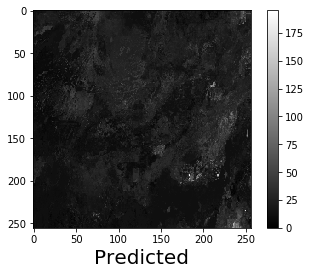

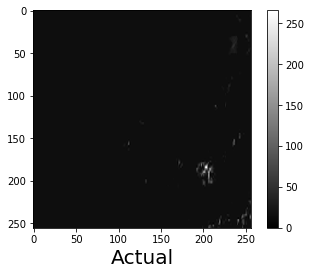

RMSE:  12.445497377295201



../satyam_rad_sat_mod_npy/sa1_npy/sat.2017072116.npy


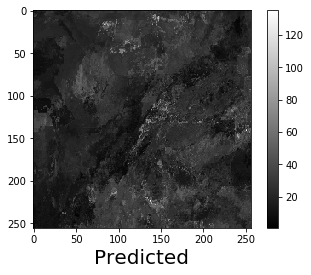

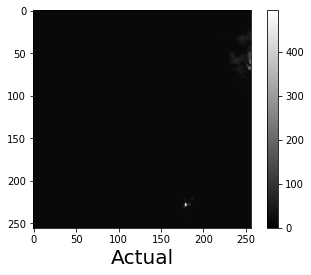

RMSE:  12.53905383566679



../satyam_rad_sat_mod_npy/sa1_npy/sat.2017072118.npy


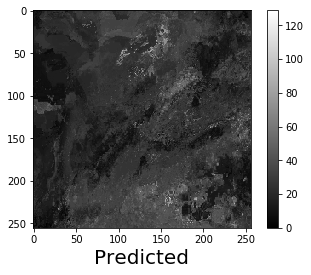

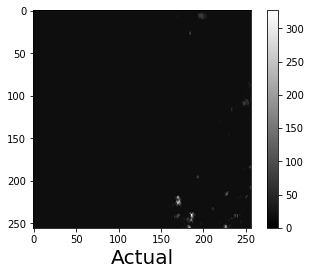

RMSE:  13.459112848120684



../satyam_rad_sat_mod_npy/sa1_npy/sat.2017072119.npy


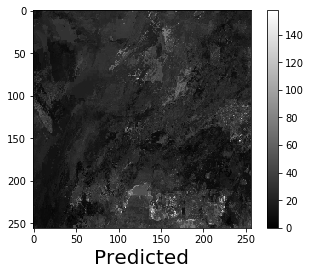

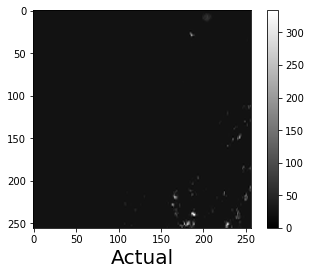

RMSE:  13.163421308800327



../satyam_rad_sat_mod_npy/sa1_npy/sat.2017072120.npy


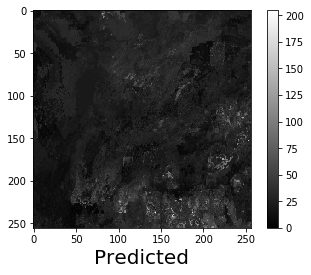

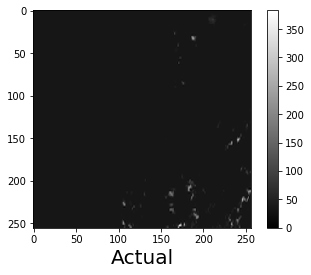

RMSE:  16.64468361688797



../satyam_rad_sat_mod_npy/sa1_npy/sat.2017072519.npy


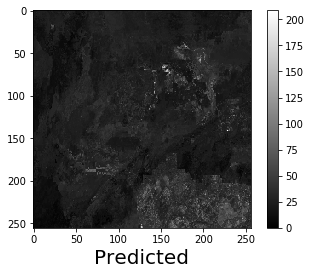

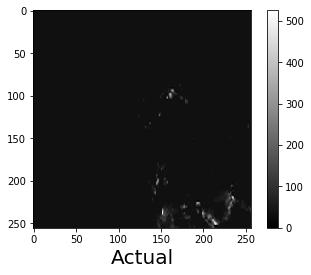

RMSE:  18.593292105542297



../satyam_rad_sat_mod_npy/sa1_npy/sat.2017072520.npy


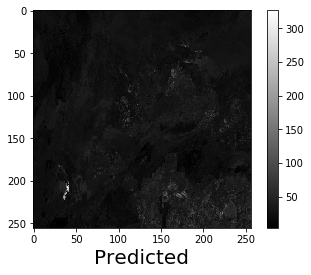

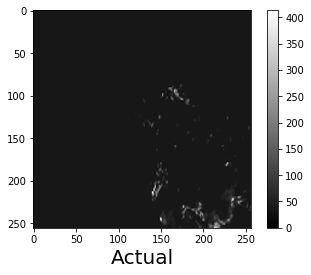

RMSE:  20.356657164322478



../satyam_rad_sat_mod_npy/sa1_npy/sat.2017080916.npy


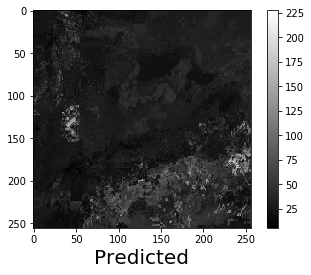

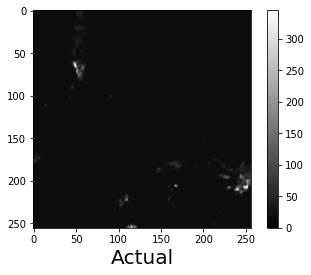

RMSE:  24.445337595989233



../satyam_rad_sat_mod_npy/sa1_npy/sat.2017080918.npy


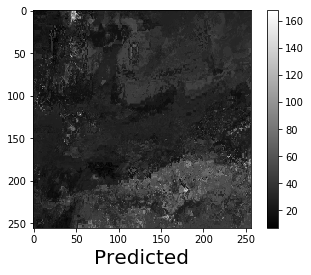

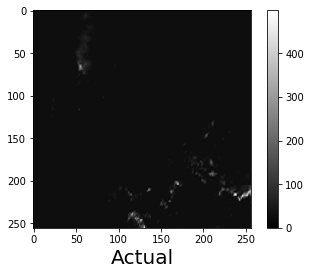

RMSE:  18.213136727559785



../satyam_rad_sat_mod_npy/sa1_npy/sat.2017080919.npy


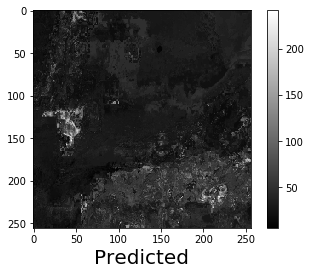

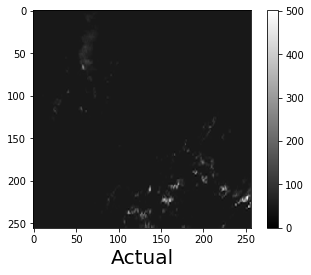

RMSE:  25.448775742019066



../satyam_rad_sat_mod_npy/sa1_npy/sat.2017080920.npy


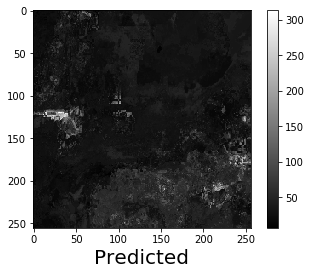

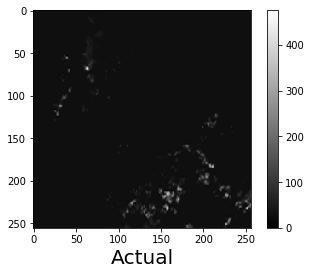

RMSE:  27.177586097107184



../satyam_rad_sat_mod_npy/sa1_npy/sat.2017081616.npy


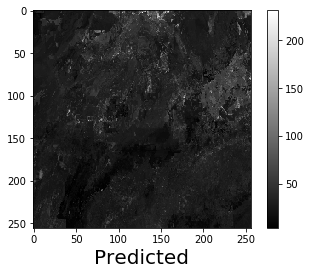

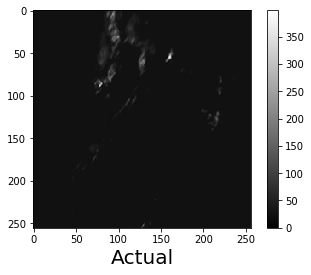

RMSE:  18.1598436716888



../satyam_rad_sat_mod_npy/sa1_npy/sat.2017081618.npy


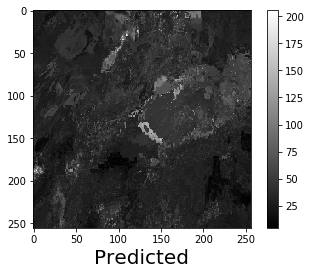

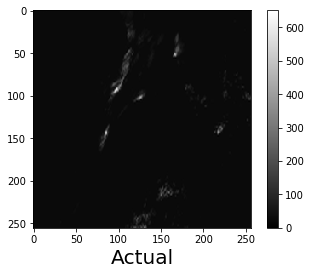

RMSE:  25.966793522588162



../satyam_rad_sat_mod_npy/sa1_npy/sat.2017081619.npy


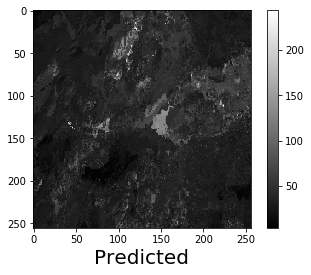

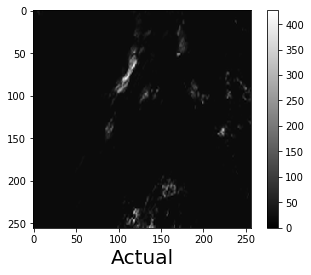

RMSE:  30.304454350156075



../satyam_rad_sat_mod_npy/sa1_npy/sat.2017081620.npy


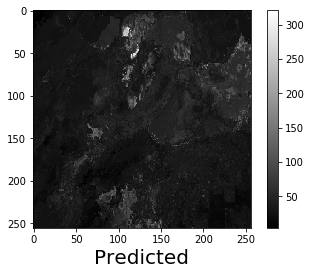

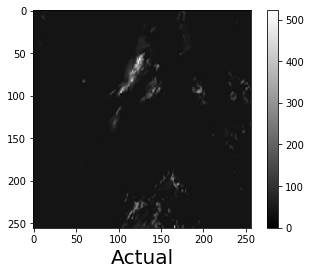

RMSE:  28.254297849793815



../satyam_rad_sat_mod_npy/sa1_npy/sat.2017081818.npy


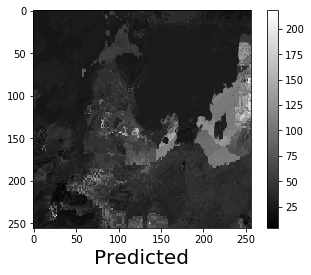

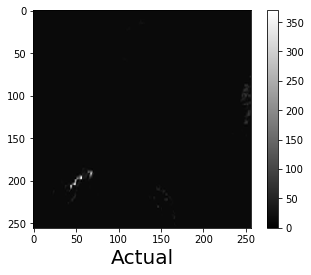

RMSE:  36.886303420584184



../satyam_rad_sat_mod_npy/sa1_npy/sat.2017081819.npy


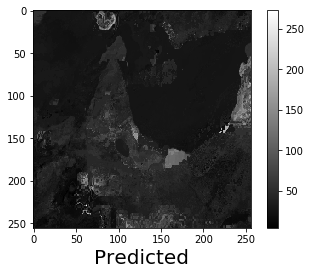

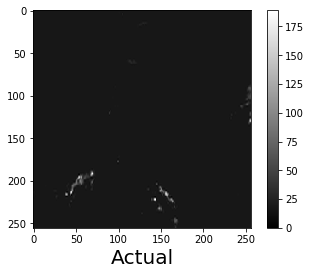

RMSE:  28.3934618153307



../satyam_rad_sat_mod_npy/sa1_npy/sat.2017081820.npy


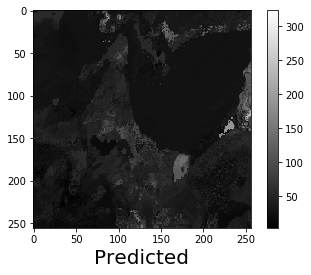

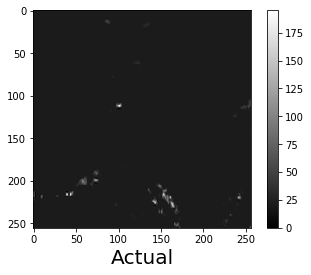

RMSE:  25.093643471763688



../satyam_rad_sat_mod_npy/sa1_npy/sat.2017082216.npy


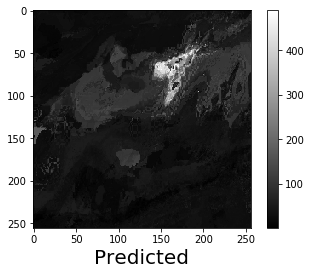

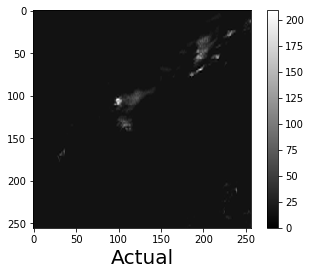

RMSE:  61.85200779831534



../satyam_rad_sat_mod_npy/sa1_npy/sat.2017082218.npy


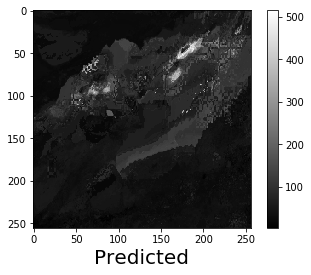

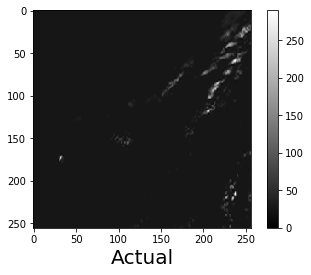

RMSE:  56.65978716943951



../satyam_rad_sat_mod_npy/sa1_npy/sat.2017082219.npy


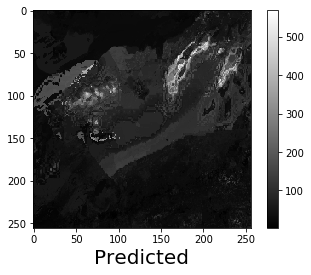

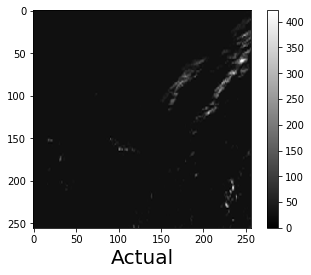

RMSE:  69.52103852333681



../satyam_rad_sat_mod_npy/sa1_npy/sat.2017082220.npy


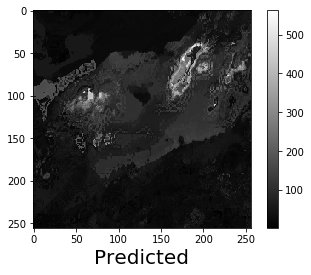

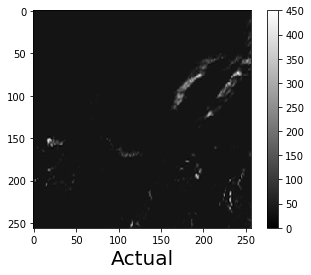

RMSE:  63.584652883187076



../satyam_rad_sat_mod_npy/sa1_npy/sat.2017082316.npy


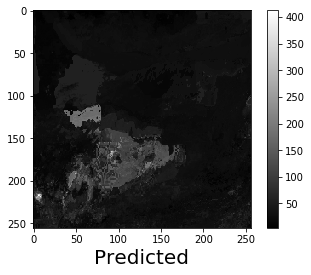

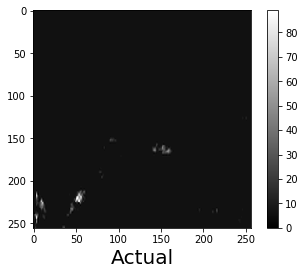

RMSE:  43.853055077220255



../satyam_rad_sat_mod_npy/sa1_npy/sat.2017082318.npy


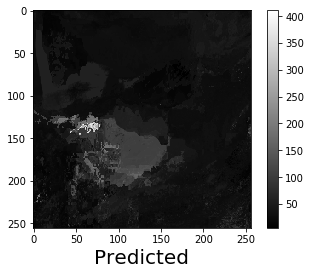

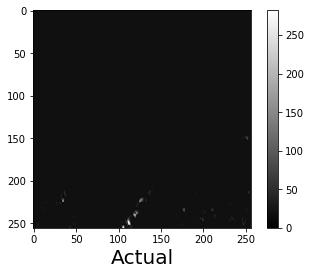

RMSE:  36.77906682642063



../satyam_rad_sat_mod_npy/sa1_npy/sat.2017082319.npy


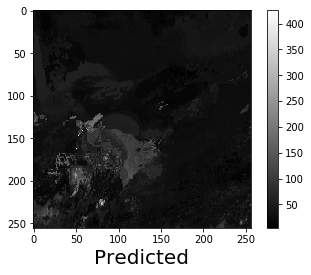

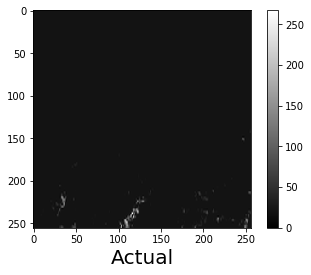

RMSE:  30.897257323285483



../satyam_rad_sat_mod_npy/sa1_npy/sat.2017082320.npy


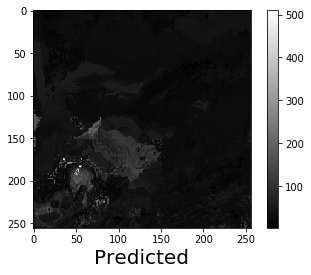

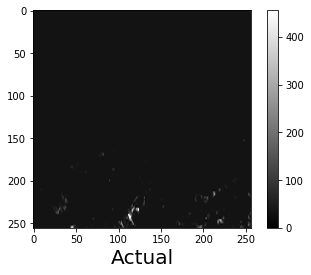

RMSE:  27.314407255503138



../satyam_rad_sat_mod_npy/sa1_npy/sat.2017082416.npy


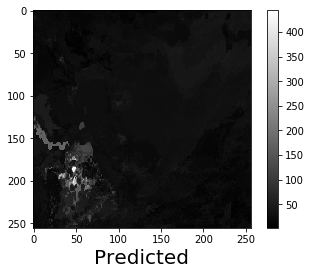

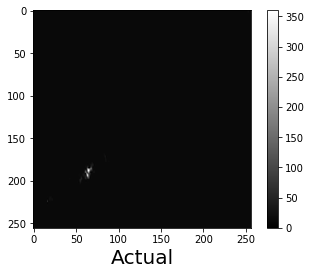

RMSE:  28.839452275803705



../satyam_rad_sat_mod_npy/sa1_npy/sat.2017082418.npy


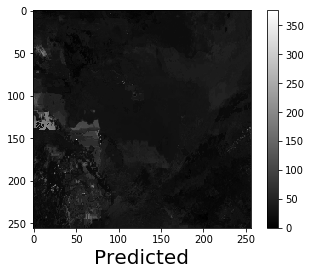

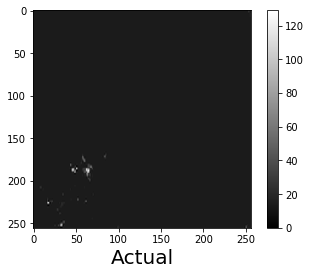

RMSE:  24.94397051777544



../satyam_rad_sat_mod_npy/sa1_npy/sat.2017082419.npy


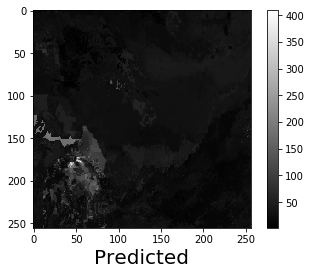

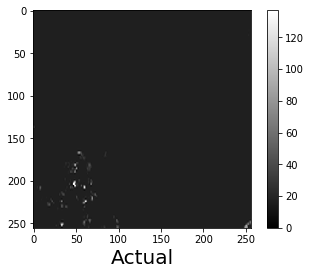

RMSE:  25.60012003155225



../satyam_rad_sat_mod_npy/sa1_npy/sat.2017082420.npy


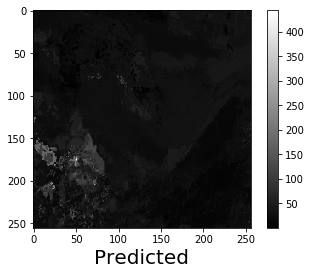

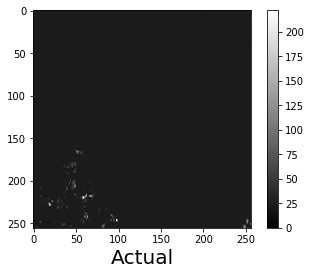

RMSE:  20.691291613744646



../satyam_rad_sat_mod_npy/sa1_npy/sat.2017082516.npy


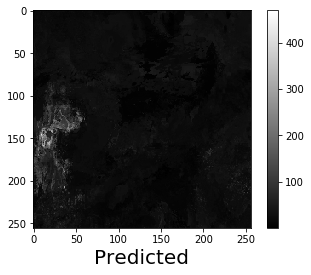

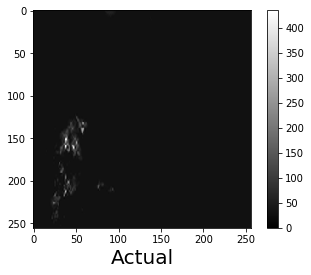

RMSE:  24.925643309591283



../satyam_rad_sat_mod_npy/sa1_npy/sat.2017082518.npy


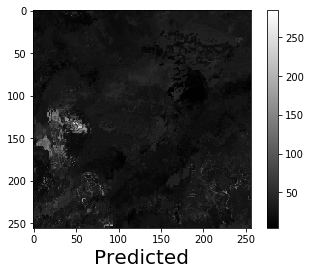

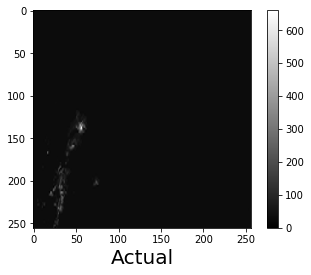

RMSE:  18.132725387554647



../satyam_rad_sat_mod_npy/sa1_npy/sat.2017082519.npy


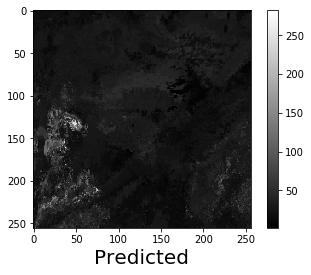

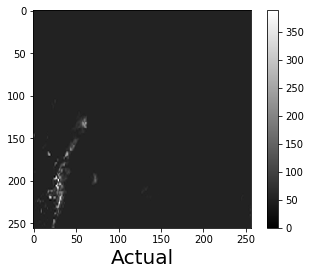

RMSE:  30.54564828798852



../satyam_rad_sat_mod_npy/sa1_npy/sat.2017082520.npy


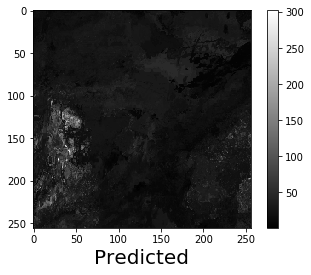

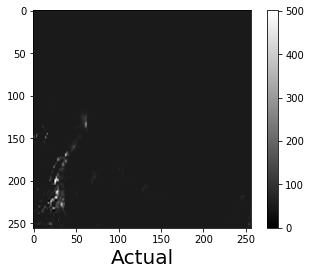

RMSE:  31.380446348401456



../satyam_rad_sat_mod_npy/sa1_npy/sat.2017082616.npy


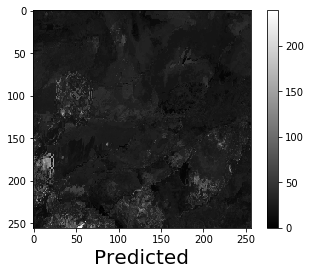

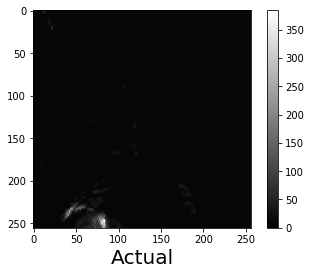

RMSE:  24.2529396461941



../satyam_rad_sat_mod_npy/sa1_npy/sat.2017082618.npy


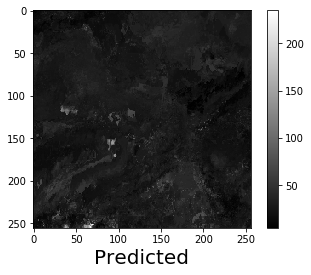

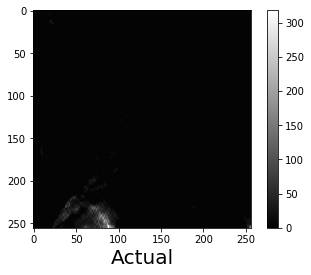

RMSE:  26.75381342720976



../satyam_rad_sat_mod_npy/sa1_npy/sat.2017082619.npy


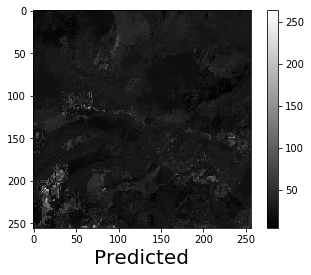

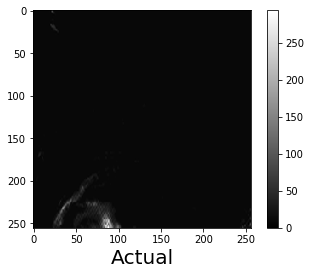

RMSE:  23.81441008989489





In [17]:
rmse_list = []
indexOf_least_rsme = 0;
least_rsme = 99999;
indexOf_largest_rsme = 0;
largest_rsme = 0;

for i in range(len(Sa1_files_test)-50):
    print(Sa1_files_test[i])
    in_ = X_test[65536*i:65536*(i+1)]
    out_ = loaded_model.predict(in_).reshape(256, 256)
    actual_ = y_test[65536*i:65536*(i+1)].reshape(256, 256)
    plt.xlabel('Predicted', fontsize=20)
    plt.imshow(out_, cmap="gray")
    plt.colorbar()
    plt.show()
    plt.xlabel('Actual', fontsize=20)
    plt.imshow(actual_, cmap="gray")
    plt.colorbar()
    plt.show()
    rsme_ = rmse(out_, actual_)
    
    print("RMSE: ", rsme_)
    print("\n\n")
    
    if(rsme_ < least_rsme):
        least_rsme = rsme_
        indexOf_least_rsme = i
        
    if(rsme_ > largest_rsme):
        largest_rsme = rsme_
        indexOf_largest_rsme = i
        
    print("====================================")

# Least RSME (Good)

../satyam_rad_sat_mod_npy/sa1_npy/sat.2017072020.npy


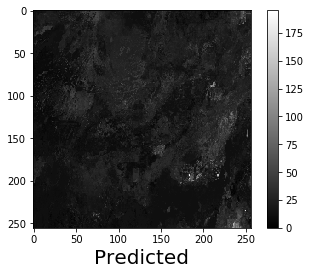

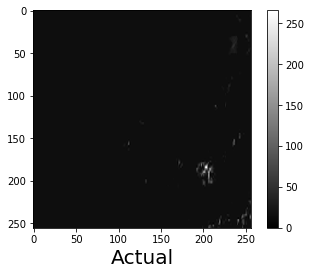

RMSE:  23.81441008989489





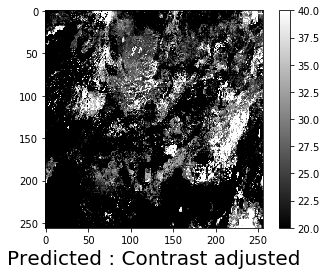

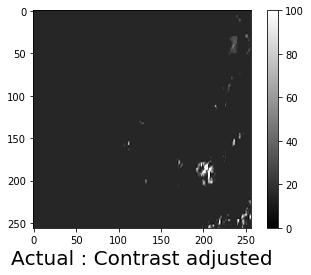

In [18]:
    i = indexOf_least_rsme

    print(Sa1_files_test[i])
    in_ = X_test[65536*i:65536*(i+1)]
    out_ = loaded_model.predict(in_).reshape(256, 256)
    actual_ = y_test[65536*i:65536*(i+1)].reshape(256, 256)
    plt.xlabel('Predicted', fontsize=20)
    plt.imshow(out_, cmap="gray")
    plt.colorbar()
    plt.show()
    plt.xlabel('Actual', fontsize=20)
    plt.imshow(actual_, cmap="gray")
    plt.colorbar()
    plt.show()
    print("RMSE: ", rsme_)
    print("\n\n")
    
    plt.imshow(out_, cmap='gray', vmin=20, vmax=40)
    plt.colorbar()
    plt.xlabel('Predicted : Contrast adjusted', fontsize=20)
    plt.show()
    
    plt.imshow(actual_, cmap='gray', vmin=0, vmax=100)
    plt.colorbar()
    plt.xlabel('Actual : Contrast adjusted', fontsize=20)
    plt.show()
    
    rsme_ = rmse(out_, actual_)

# Latgest RSME (Bad)

../satyam_rad_sat_mod_npy/sa1_npy/sat.2017082219.npy


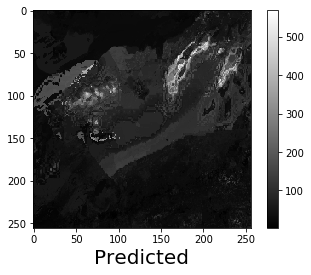

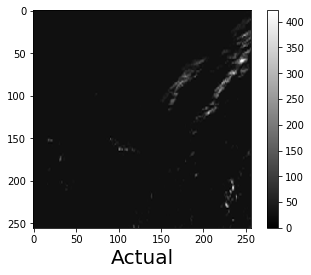

RMSE:  12.445497377295201





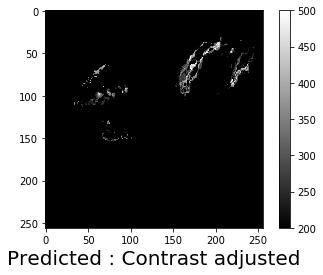

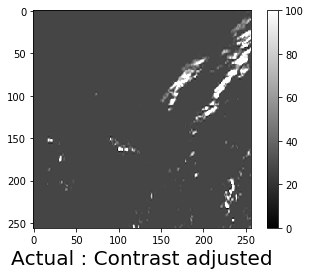

In [19]:
    i = indexOf_largest_rsme
    print(Sa1_files_test[i])
    in_ = X_test[65536*i:65536*(i+1)]
    out_ = loaded_model.predict(in_).reshape(256, 256)
    actual_ = y_test[65536*i:65536*(i+1)].reshape(256, 256)
    plt.xlabel('Predicted', fontsize=20)
    plt.imshow(out_, cmap="gray")
    plt.colorbar()
    plt.show()
    plt.xlabel('Actual', fontsize=20)
    plt.imshow(actual_, cmap="gray")
    plt.colorbar()
    plt.show()
    print("RMSE: ", rsme_)
    print("\n\n")
    
    plt.imshow(out_, cmap='gray', vmin=200, vmax=500)
    plt.colorbar()
    plt.xlabel('Predicted : Contrast adjusted', fontsize=20)
    plt.show()
    
    plt.imshow(actual_, cmap='gray', vmin=0, vmax=100)
    plt.colorbar()
    plt.xlabel('Actual : Contrast adjusted', fontsize=20)
    plt.show()
    
    rsme_ = rmse(out_, actual_)

In [20]:
# Confusion Matrix

In [21]:
real_flattened = y_test.flatten()
pred_flattened = loaded_model.predict(X_test).flatten()

In [22]:
thershold = np.mean(real_flattened) + 1 * np.std(real_flattened)
thershold

35.59545003207454

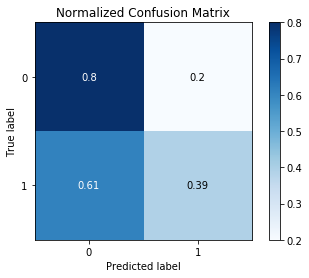

In [23]:
y_train_copy = np.copy(real_flattened)
y_train_copy[y_train_copy < thershold] = 0
y_train_copy[y_train_copy >= thershold] = 1

predictions_train_copy = np.copy(pred_flattened)
predictions_train_copy[predictions_train_copy < thershold] = 0
predictions_train_copy[predictions_train_copy >= thershold] = 1

skplt.metrics.plot_confusion_matrix(y_train_copy, predictions_train_copy, normalize=True)
plt.show()

In [24]:
from sklearn.metrics import confusion_matrix
FPR = []
TPR = []

for i in range(1, np.max(real_flattened), 10):
    y_train_copy = np.copy(real_flattened)
    y_train_copy[y_train_copy < i] = 0
    y_train_copy[y_train_copy >= i] = 1

    predictions_train_copy = np.copy(pred_flattened)
    predictions_train_copy[predictions_train_copy < i] = 0
    predictions_train_copy[predictions_train_copy >= i] = 1
    
    temp = confusion_matrix(y_train_copy, predictions_train_copy)
    
    TN = temp[0][0]
    FP = temp[0][1]
    FN = temp[1][0]
    TP = temp[1][1]
    
    TPR_ = TP/(TP+FN)
    FPR_ = FP/(TN+FP)
    
    FPR.append(FPR_)
    TPR.append(TPR_)

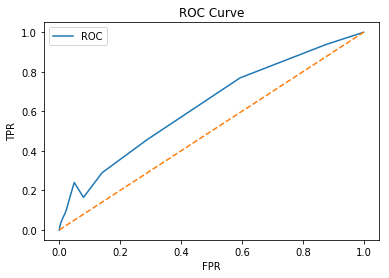

In [25]:
plt.plot(FPR, TPR, label='ROC')
plt.plot([0,1], [0,1], linestyle='dashed')
plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR");
plt.legend()